# Lab 1.1 PyTorch Tensor基础
在这个notebook中，我们将学习PyTorch Tensor的一些基础知识，并完成最后的练习。

同学可以阅读教程并逐个运行代码块来观察程序输出。Lab 1.1中不需要用到大量的GPU加速，只需要同学们在notebook最后部分尝试。如果要打开GPU加速，请参考Lab1 PPT中阿里云算力使用的说明。

如果是CPU环境，下面的torch.cuda.is_available()会输出False；GPU环境则输出True。

In [3]:
import torch
print(torch.cuda.is_available())
print(torch.__version__)

True
1.12.1+cu113


## 为什么需要张量？

为了回答这个问题，我们将PyTorch张量和Python列表、NumPy数组做了一个简单的对比。同时我们比较使用GPU加速的PyTorch张量计算和仅用CPU计算的情况。下面这段代码同学们可以不用运行，结果已经给出。

In [30]:
import numpy as np
import torch
import time

how_long = 1000000

a = list(range(how_long))
b = np.arange(how_long)
c = torch.arange(how_long)
d = torch.arange(how_long).cuda()

start_time = time.time() #记录当前时间戳
a = [tmp + 1 for tmp in a] #这是一个列表推导式 操作/取出元素/对象
print(f"Python List Time: {time.time() - start_time} seconds") 
#f为格式化字符串，允许在字符串里插入变量，大括号包裹即可

start_time = time.time()
b = b + 1.0 #对 b 中的所有元素逐个执行加法运算,直接作用在整个数组
print(f"NumPy Array Time: {time.time() - start_time} seconds")

start_time = time.time()
c = c + 1.0
print(f"PyTorch Tensor Time: {time.time() - start_time} seconds")

start_time = time.time()
d = d + 1.0
print(f"PyTorch Tensor Cuda Time: {time.time() - start_time} seconds")

Python List Time: 0.045069217681884766 seconds
NumPy Array Time: 0.0017247200012207031 seconds
PyTorch Tensor Time: 0.0009222030639648438 seconds
PyTorch Tensor Cuda Time: 0.00013303756713867188 seconds


对一个长度为一百万的数组每个元素加一，我们可以看到四种方式的用时比较：

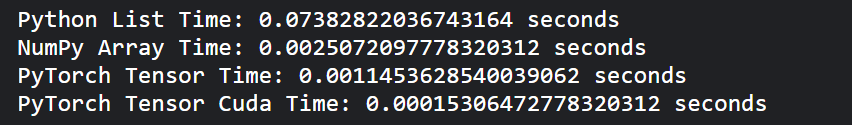

速度上：PyTorch Tensor Cuda (GPU) > PyTorch Tensor (CPU) > NumPy Array > Python List

利用GPU并行计算的特性，速度会大大加快。深度学习中涉及大量的矩阵加法、矩阵乘法，而这些操作可以很好地并行，因此使用PyTorch Tensor，可以帮助我们高效地进行深度学习的模型训练、推理。尤其是在深度学习模型、数据集规模都非常庞大的今天。

## Tensor基础

### 创建、读写张量
+ 一个张量（Tensor）是一个多维的数组，其中所有元素值的类型（int, long, boolean, float32, ...）相同。
+ 张量维度的数量是张量的秩（rank）；张量的形状（shape）是一个整数元组，给出了数组沿每个维度的大小。
+ 我们可以从Python列表、NumPy数组来初始化torch张量。类似于Python列表，我们可以使用方括号访问或修改PyTorch张量的元素。
+ 从PyTorch张量访问一个元素返回一个PyTorch标量；我们可以使用.item()方法将其转换为Python标量。

In [9]:
# Create a two-dimensional tensor
import torch
b = torch.tensor([[1, 2, 3], [4, 5, 5]])
print('Here is b:')
print(b)
print('rank of b:', b.dim())
print('b.shape: ', b.shape)
# Access elements
print()
print('b[0, 1]:', b[0, 1]) #第0行第0列开始
print('b[1, 2]:', b[1, 2])
# Mutate elements
b[1, 1] = 100
print()
print('b after mutating:')
print(b)

Here is b:
tensor([[1, 2, 3],
        [4, 5, 5]])
rank of b: 2
b.shape:  torch.Size([2, 3])

b[0, 1]: tensor(2)
b[1, 2]: tensor(5)

b after mutating:
tensor([[  1,   2,   3],
        [  4, 100,   5]])


### Tensor构造函数
PyTorch提供了很多内置的构造函数来构造张量，从而避免我们重复地手写Python列表。一些常用的构造函数如下：
+ [`torch.zeros`](https://pytorch.org/docs/stable/generated/torch.zeros.html): 创建一个全是0的张量
+ [`torch.ones`](https://pytorch.org/docs/stable/generated/torch.ones.html): 创建一个全是1的张量
+ [`torch.rand`](https://pytorch.org/docs/stable/generated/torch.rand.html): 创建一个包含正态分布随机数的张量
+ [更多构造函数](https://pytorch.org/docs/stable/torch.html#creation-ops)

In [19]:
# Create a tensor of all zeros
a = torch.zeros(2, 3)
print('tensor of zeros:')
print(a)

# Create a tensor of all ones
b = torch.ones(1, 2)
print('\ntensor of ones:')
print(b)

# Create a 3x3 identity matrix
c = torch.eye(3)
print('\nidentity matrix:')
print(c)

# Tensor of random values
d = torch.rand(4, 5)
print('\nrandom tensor:')
print(d)
print(f'shape of d: {d.shape}')

tensor of zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor of ones:
tensor([[1., 1.]])

identity matrix:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

random tensor:
tensor([[0.9664, 0.2850, 0.4516, 0.8149, 0.1477],
        [0.3619, 0.9907, 0.1075, 0.1545, 0.5399],
        [0.1312, 0.2888, 0.8977, 0.6411, 0.9614],
        [0.5705, 0.1212, 0.0764, 0.3816, 0.3106]])
shape of d: torch.Size([4, 5])


### 数据类型
在上面的例子中，你可能已经注意到，我们的一些张量包含了浮点值，而其他的包含了整数值。PyTorch 提供了一大套数值数据类型，你可以用它们来构造张量。当你创建一个张量时，PyTorch 会尝试猜测一个数据类型；构造张量的函数通常有一个 dtype 参数，你可以使用它来显式指定一个数据类型，也可以对某个张量访问这个参数来知道它的数据类型是什么。

In [20]:
# Let torch choose the datatype
x0 = torch.tensor([1, 2])   # List of integers
x1 = torch.tensor([1., 2.]) # List of floats
x2 = torch.tensor([1., 2])  # Mixed list
print('dtype when torch chooses for us:')
print('List of integers:', x0.dtype)
print('List of floats:', x1.dtype)
print('Mixed list:', x2.dtype)

# Force a particular datatype
y0 = torch.tensor([1, 2], dtype=torch.float32)  # 32-bit float
y1 = torch.tensor([1, 2], dtype=torch.int32)    # 32-bit (signed) integer
print('\ndtype when we force a datatype:')
print('32-bit float: ', y0.dtype)
print('32-bit integer: ', y1.dtype)

# Other creation ops also take a dtype argument
z0 = torch.ones(1, 2)  # Let torch choose for us
z1 = torch.ones(1, 2, dtype=torch.int16) # 16-bit (signed) integer
print('\ntorch.ones with different dtypes')
print('default dtype:', z0.dtype)
print('16-bit integer:', z1.dtype)

dtype when torch chooses for us:
List of integers: torch.int64
List of floats: torch.float32
Mixed list: torch.float32

dtype when we force a datatype:
32-bit float:  torch.float32
32-bit integer:  torch.int32

torch.ones with different dtypes
default dtype: torch.float32
16-bit integer: torch.int16


### Tensor索引（切片，Slice）
类似于 Python 列表和 numpy 数组，PyTorch 张量可以使用 start:stop 或 start:stop:step 语法进行切片。这里和Python列表类似是左闭右开区间，即选择出来的元素包含start，但是不包含stop。

开始和停止索引可以是负数，在这种情况下，它们从张量的末尾向后计数。

In [21]:
# A quick review for slicing Python list
a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(0, a)        # (0) Original
print(1, a[2:5])   # (1) Elements between index 2 and 5
print(2, a[2:])    # (2) Elements after index 2
print(3, a[:5])    # (3) Elements before index 5
print(4, a[:])     # (4) All elements
print(5, a[1:5:2]) # (5) Every second element between indices 1 and 5
print(6, a[:-1])   # (6) All but the last element
print(7, a[-4::2]) # (7) Every second element, starting from the fourth-last

# PyTorch has the same behavior
a = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(0, a)        # (0) Original tensor
print(1, a[2:5])   # (1) Elements between index 2 and 5
print(2, a[2:])    # (2) Elements after index 2
print(3, a[:5])    # (3) Elements before index 5
print(4, a[:])     # (4) All elements
print(5, a[1:5:2]) # (5) Every second element between indices 1 and 5
print(6, a[:-1])   # (6) All but the last element
print(7, a[-4::2]) # (7) Every second element, starting from the fourth-last

0 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
1 [3, 4, 5]
2 [3, 4, 5, 6, 7, 8, 9, 10]
3 [1, 2, 3, 4, 5]
4 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
5 [2, 4]
6 [1, 2, 3, 4, 5, 6, 7, 8, 9]
7 [7, 9]
0 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
1 tensor([3, 4, 5])
2 tensor([ 3,  4,  5,  6,  7,  8,  9, 10])
3 tensor([1, 2, 3, 4, 5])
4 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
5 tensor([2, 4])
6 tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
7 tensor([7, 9])


对于多维数组，你可以为每一个数组维度提供这样一个切片来索引出你需要的部分。

In [23]:
# Create the following rank 2 tensor with shape (3, 4)
a = torch.tensor([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print('Original tensor')
print(a)

# From row 1 to row 2; From col 0 to col 1
a1 = a[1:3, 0:2]
print(a1, a1.shape)

# From row 1 to row 1; From col 0 to col 0
a2 = a[1:2, 0:1]
print(a2, a2.shape) # rank is preserved

# row 1; col 0

a3 = a[1, 0]
print(a3, a3.shape) # rank is not preserved

Original tensor
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])
tensor([[ 5,  6],
        [ 9, 10]]) torch.Size([2, 2])
tensor([[5]]) torch.Size([1, 1])
tensor(5) torch.Size([])


### Tensor索引（数组索引）
当你使用切片对 torch 张量进行索引时，得到的张量视图将始终是原张量的一个子数组。
相比于切片，我们还可以使用一个数组来索引张量，让我们在构造新张量时比使用切片拥有更多的灵活性。

这个步骤可以理解为：我们先定义一个数组，并将数组中的每一个元素作为索引找出我们需要的部分，并按照数组的顺序将这些部分组合成新的张量。

例如，我们可以使用数组来按照某一个特定维度索引张量（一次取出某一个行/列），也可以同时对多个维度进行索引：

In [25]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('Original tensor:')
print(a)

# Create a new tensor of shape (5, 4) by reordering rows from a:
# - First two rows same as the first row of a
# - Third row is the same as the last row of a
# - Fourth and fifth rows are the same as the second row from a
idx = [0, 0, 2, 1, 1]  # index arrays can be Python lists of integers
print('\nReordered rows:')
print(a[idx])

# Create a new tensor of shape (3, 4) by reversing the columns from a
idx = torch.tensor([3, 2, 1, 0])  # Index arrays can be int64 torch tensors
print('\nReordered columns:')
print(a[:, idx])

# Indexing multiple dimensions together
# idx_row and idx_col should have the same shape
# or be broadcastable together (refer to following chapters for broadcasting)
# In the following example, we index elements at (2, 1), (1, 2), (0, 0)
idx_row = torch.tensor([2, 1, 0])
idx_col = torch.tensor([1, 2, 0])
print('\nIndexing multiple dimensions:')
print(a[idx_row, idx_col])

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Reordered rows:
tensor([[ 1,  2,  3,  4],
        [ 1,  2,  3,  4],
        [ 9, 10, 11, 12],
        [ 5,  6,  7,  8],
        [ 5,  6,  7,  8]])

Reordered columns:
tensor([[ 4,  3,  2,  1],
        [ 8,  7,  6,  5],
        [12, 11, 10,  9]])

Indexing multiple dimensions:
tensor([10,  7,  1])


### 根据索引给Tensor赋值
当你使用切片、数组这两种方式来索引一个Tensor时，可以对选定的部分赋上新的值。这种赋值操作被称为in-place操作，也就是该张量并没有被新建，只有它内部的元素值发生变化。具体来说，它内存的地址没有变化。

因此，如果我们把同一个张量赋值给多个Python变量，更改其中一个会导致原始张量发生变化。但是如果我们将某个张量克隆，它们就有了新的地址，可以被区分。我们看看代码区分这两种操作。

我们通常可以用.data_ptr()来看两个变量是否指向了同一个张量。

In [28]:
# Create the following rank 2 tensor with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('Original tensor:')
print(a)
print()

# inplace operation: give new values to a based on indexing
# given new values to col.1 
a[:, 1] = 100
print('a with new Values at col.1:')
print(a)
print()

# create a tensor based on a
b = a
b[:, 2] = 10
print('modifying b also changes a:')
print(a)
print(b)
print()

# create a tensor based on a's clone
c = a.clone()
c[:, 3] = 0
print('modifying c does not change a or b:')
print(a)
print(b)
print(c)
print()

# a and b share the same memory addr
print('a\'s address\':')
print(a.data_ptr())
print('b\'s address\':')
print(b.data_ptr())
print('c\'s address\':')
print(c.data_ptr())

Original tensor:
tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

a with new Values at col.1:
tensor([[  1, 100,   3,   4],
        [  5, 100,   7,   8],
        [  9, 100,  11,  12]])

modifying b also changes a:
tensor([[  1, 100,  10,   4],
        [  5, 100,  10,   8],
        [  9, 100,  10,  12]])
tensor([[  1, 100,  10,   4],
        [  5, 100,  10,   8],
        [  9, 100,  10,  12]])

modifying c does not change a or b:
tensor([[  1, 100,  10,   4],
        [  5, 100,  10,   8],
        [  9, 100,  10,  12]])
tensor([[  1, 100,  10,   4],
        [  5, 100,  10,   8],
        [  9, 100,  10,  12]])
tensor([[  1, 100,  10,   0],
        [  5, 100,  10,   0],
        [  9, 100,  10,   0]])

a's address':
1155343296
b's address':
1155343296
c's address':
1155348160


### 形状操作
#### View
PyTorch 提供了许多方法来操作张量的形状。最简单的例子是 [`.view()`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html)：这会返回一个新的张量，其元素数量与输入相同，但形状不同。
我们可以使用 .view() 将矩阵展平成向量，以及将秩为 1 的向量转换成秩为 2 的行或列矩阵：

In [29]:
x0 = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])
print('Original tensor x0:')
print(x0)
print('shape:', x0.shape)

# Flatten x0 into a rank 1 vector of shape (8,)
x1 = x0.view(8)
print('\nFlattened tensor x1:')
print(x1)
print('shape:', x1.shape)

# Convert x1 to a rank 2 "row vector" of shape (1, 8)
x2 = x1.view(1, 8)
print('\nRow vector x2:')
print(x2)
print('shape:', x2.shape)

# Convert x1 to a rank 2 "column vector" of shape (8, 1)
x3 = x1.view(8, 1)
print('\nColumn vector x3:')
print(x3)
print('shape:', x3.shape)

# Convert x1 to a rank 3 tensor of shape (2, 2, 2):
x4 = x1.view(2, 2, 2)
print('\nRank 3 tensor x4:')
print(x4)
print('shape:', x4.shape)

Original tensor x0:
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
shape: torch.Size([2, 4])

Flattened tensor x1:
tensor([1, 2, 3, 4, 5, 6, 7, 8])
shape: torch.Size([8])

Row vector x2:
tensor([[1, 2, 3, 4, 5, 6, 7, 8]])
shape: torch.Size([1, 8])

Column vector x3:
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8]])
shape: torch.Size([8, 1])

Rank 3 tensor x4:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
shape: torch.Size([2, 2, 2])


为了方便起见，调用 .view() 时可以包含一个单独的 -1 参数，-1代表了我们在该维度上放置尽可能多的元素。

假设我们对于元素个数为 N=x*y*z 的张量做
+ .view(x, -1, z) 操作，那么 -1 这个维度上会有 y 个元素
+ .view(x, -1) 操作，那么 -1 这个维度上会有 yz 个元素

In [30]:
# We can reuse these functions for tensors of different shapes
x0 = torch.tensor([[1, 2, 3], [4, 5, 6]])

print('x0:')
print(x0)
print('x0_flat:')
print(x0.view(-1), x0.view(-1).shape)
print('x0_flat:')
print(x0.view(1, -1), x0.view(1, -1).shape)

x0:
tensor([[1, 2, 3],
        [4, 5, 6]])
x0_flat:
tensor([1, 2, 3, 4, 5, 6]) torch.Size([6])
x0_flat:
tensor([[1, 2, 3, 4, 5, 6]]) torch.Size([1, 6])


#### 转置
要执行的另一个常见的形状是转置矩阵。如果你尝试使用 .view() 转置矩阵，不可行：view() 函数按行主序取元素，因此你不能使用 .view() 来转置矩阵。.view() 只能用来给张量添加新的维度，或者折叠张量的相邻维度。

对于其他类型的重塑操作，你通常需要使用可以交换张量轴的函数。最简单的此类函数是 .t()，专门用于转置矩阵。

In [31]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print('Original matrix:')
print(x)
print('\nTransposing with view DOES NOT WORK!')
print(x.view(3, 2))
print('\nTransposed matrix:')
print(torch.t(x))
print(x.t())

Original matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Transposing with view DOES NOT WORK!
tensor([[1, 2],
        [3, 4],
        [5, 6]])

Transposed matrix:
tensor([[1, 4],
        [2, 5],
        [3, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])


.t() 方法只能用以处理两个维度的情况，如果出现了更多的维度，那么需要使用 [`torch.transpose`](https://pytorch.org/docs/stable/generated/torch.transpose.html)来进行处理。

此外，[`torch.permute`](https://pytorch.org/docs/stable/generated/torch.permute.html)可以同时交换多个轴的元素。

In [15]:
# Create a tensor of shape (2, 3, 4)
x0 = torch.tensor([
     [[1,  2,  3,  4],
      [5,  6,  7,  8],
      [9, 10, 11, 12]],
     [[13, 14, 15, 16],
      [17, 18, 19, 20],
      [21, 22, 23, 24]]])
print('Original tensor:')
print(x0)
print('shape:', x0.shape)

# Swap axes 1 and 2; shape is (2, 4, 3)
x1 = x0.transpose(1, 2)
print('\nSwap axes 1 and 2:')
print(x1)
print(x1.shape)

# Permute axes; the argument (1, 2, 0) means:
# - Make the old dimension 1 appear at dimension 0;
# - Make the old dimension 2 appear at dimension 1;
# - Make the old dimension 0 appear at dimension 2
# This results in a tensor of shape (3, 4, 2)
x2 = x0.permute(1, 2, 0)
print('\nPermute axes')
print(x2)
print('shape:', x2.shape)

Original tensor:
tensor([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],

        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])
shape: torch.Size([2, 3, 4])

Swap axes 1 and 2:
tensor([[[ 1,  5,  9],
         [ 2,  6, 10],
         [ 3,  7, 11],
         [ 4,  8, 12]],

        [[13, 17, 21],
         [14, 18, 22],
         [15, 19, 23],
         [16, 20, 24]]])
torch.Size([2, 4, 3])

Permute axes
tensor([[[ 1, 13],
         [ 2, 14],
         [ 3, 15],
         [ 4, 16]],

        [[ 5, 17],
         [ 6, 18],
         [ 7, 19],
         [ 8, 20]],

        [[ 9, 21],
         [10, 22],
         [11, 23],
         [12, 24]]])
shape: torch.Size([3, 4, 2])


### Tensor运算
到目前为止，我们已经看到了如何构建、访问和处理张量形状。但使用张量的最重要原因之一是为了计算。PyTorch 提供了许多不同的操作来对张量执行计算。

#### 元素级（Elementwise）运算
如果我们在两个张量上用基本数学符号，那么会逐元素进行运算。此外，PyTorch提供了sin、cos、sqrt等多种[数学运算](https://pytorch.org/docs/stable/torch.html#pointwise-ops)。

In [17]:
x = torch.tensor([[1, 2, 3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6, 7, 8]], dtype=torch.float32)

# Elementwise sum; all give the same result
print('Elementwise sum:')
print(x + y)
print(torch.add(x, y))
print(x.add(y))

# Elementwise difference
print('\nElementwise difference:')
print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

# Elementwise product
print('\nElementwise product:')
print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

# Elementwise division
print('\nElementwise division')
print(x / y)
print(torch.div(x, y))
print(x.div(y))

# Elementwise power
print('\nElementwise power')
print(x ** y)
print(torch.pow(x, y))
print(x.pow(y))

print('\nSquare root:')
print(torch.sqrt(x))
print(x.sqrt())

print('\nTrig functions:')
print(torch.sin(x))
print(x.sin())
print(torch.cos(x))
print(x.cos())

Elementwise sum:
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])
tensor([[ 6.,  8., 10., 12.]])

Elementwise difference:
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])
tensor([[-4., -4., -4., -4.]])

Elementwise product:
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])
tensor([[ 5., 12., 21., 32.]])

Elementwise division
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])
tensor([[0.2000, 0.3333, 0.4286, 0.5000]])

Elementwise power
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])
tensor([[1.0000e+00, 6.4000e+01, 2.1870e+03, 6.5536e+04]])

Square root:
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])
tensor([[1.0000, 1.4142, 1.7321, 2.0000]])

Trig functions:
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.8415,  0.9093,  0.1411, -0.7568]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])
tensor([[ 0.5403, -0.4161, -0.9900, -0.6536]])


#### 聚合（Reduction）运算

到目前为止，我们已经看到了在张量上执行逐元素运算。有时，我们可能希望执行在张量的部分或全部上进行聚合的操作，例如对多个元素求和、求平均、求最大最小值。

最简单的缩减操作是求和。我们可以使用[.sum()](https://pytorch.org/docs/stable/generated/torch.Tensor.sum.html) 方法来对整个张量进行缩减，或者使用 dim 参数沿着张量的某个维度进行缩减：

In [13]:
x = torch.tensor([[1, 2, 3], 
                  [4, 5, 6]], dtype=torch.float32)
print('Original tensor:')
print(x)

print('\nSum over entire tensor:')
print(torch.sum(x))
print(x.sum())

# We can sum over the first dimension:
print('\nSum over the first dimension:')
print(torch.sum(x, dim=0))
print(x.sum(dim=0))

# Sum over the second dimension:
print('\nSum over the second dimension:')
print(torch.sum(x, dim=1))
print(x.sum(dim=1))

Original tensor:
tensor([[1., 2., 3.],
        [4., 5., 6.]])

Sum over entire tensor:
tensor(21.)
tensor(21.)

Sum over the first dimension:
tensor([5., 7., 9.])
tensor([5., 7., 9.])

Sum over the second dimension:
tensor([ 6., 15.])
tensor([ 6., 15.])


对于某一个维度（dim）的求和，会将这一个维度从原本的张量中去除。如果我们将 .sum() 方法中的keepdim参数设置为True，那么这个维度会被保留。维度大小变为1，其实也就相当于去除了。

In [17]:
# Create a tensor of shape (3, 4, 5, 6)
x = torch.randn(3, 4, 5, 6)
print('x.shape: ', x.shape)

# Summing over dim=0 eliminates the dimension at index 0 (of size 3):
print('x.sum(dim=0).shape: ', x.sum(dim=0).shape)
print('x.sum(dim=0, keepdim=True).shape: ', x.sum(dim=0, keepdim=True).shape)

# Summing with dim=1 eliminates the dimension at index 1 (of size 4):
print('x.sum(dim=1).shape: ', x.sum(dim=1).shape)
print('x.sum(dim=1, keepdim=True).shape: ', x.sum(dim=1, keepdim=True).shape)

# Summing with dim=2 eliminates the dimension at index 2 (of size 5):
print('x.sum(dim=2).shape: ', x.sum(dim=2).shape)
print('x.sum(dim=2, keepdim=True).shape: ', x.sum(dim=2, keepdim=True).shape)

# Summing with dim=3 eliminates the dimension at index 3 (of size 6):
print('x.sum(dim=3).shape: ', x.sum(dim=3).shape)
print('x.sum(dim=3, keepdim=True).shape: ', x.sum(dim=3, keepdim=True).shape)

x.shape:  torch.Size([3, 4, 5, 6])
x.sum(dim=0).shape:  torch.Size([4, 5, 6])
x.sum(dim=0, keepdim=True).shape:  torch.Size([1, 4, 5, 6])
x.sum(dim=1).shape:  torch.Size([3, 5, 6])
x.sum(dim=1, keepdim=True).shape:  torch.Size([3, 1, 5, 6])
x.sum(dim=2).shape:  torch.Size([3, 4, 6])
x.sum(dim=2, keepdim=True).shape:  torch.Size([3, 4, 1, 6])
x.sum(dim=3).shape:  torch.Size([3, 4, 5])
x.sum(dim=3, keepdim=True).shape:  torch.Size([3, 4, 5, 1])


求平均方法 [.mean()](https://pytorch.org/docs/stable/generated/torch.mean.html#torch.mean) 和求和的使用方法类似，我们接着简要介绍最值计算方式，以最小值 [.min()](https://pytorch.org/docs/stable/generated/torch.min.html#torch.min) 为例。我们既可以算出整个张量的最小值，也可以算沿着某一维度的最小值，和 .sum()的过程十分类似。需要注意的是， .min() 与 .max() 方法会返回两个结果，一个是最值，还有一个是最值在当前维度的数组下标。这个下标也可以通过 [.argmin()](https://pytorch.org/docs/stable/generated/torch.argmin.html#torch.argmin) 与 [.argmax()](https://pytorch.org/docs/stable/generated/torch.argmax.html#torch.argmax) 方法直接算出。

In [5]:
x = torch.tensor([[2, 4, 3, 5], [3, 3, 5, 2]], dtype=torch.float32)
print('Original tensor:')
print(x, x.shape)

# Finding the overall minimum only returns a single value
print('\nOverall minimum: ', x.min())

# Compute the minimum along each column; we get both the value and location:
# The minimum of the first column is 2, and it appears at index 0;
# the minimum of the second column is 3 and it appears at index 1; etc
col_min_vals, col_min_idxs = x.min(dim=0)
print('\nMinimum along each column:')
print('values:', col_min_vals)
print('idxs:', col_min_idxs)

# Compute the minimum along each row; we get both the value and the minimum
row_min_vals, row_min_idxs = x.min(dim=1)
print('\nMinimum along each row:')
print('values:', row_min_vals)
print('idxs:', row_min_idxs)

Original tensor:
tensor([[2., 4., 3., 5.],
        [3., 3., 5., 2.]]) torch.Size([2, 4])

Overall minimum:  tensor(2.)

Minimum along each column:
values: tensor([2., 3., 3., 2.])
idxs: tensor([0, 1, 0, 1])

Minimum along each row:
values: tensor([2., 2.])
idxs: tensor([0, 3])


#### 矩阵运算
与MATLAB不同，* 在PyTorch中表示逐元素乘法，而不是矩阵乘法。PyTorch提供了许多方法来计算不同类型的向量和矩阵积。其中最常用的有：
+ [`torch.dot`](https://pytorch.org/docs/stable/generated/torch.dot.html): 计算向量的内积
+ [`torch.mm`](https://pytorch.org/docs/stable/generated/torch.mm.html): 计算矩阵-矩阵乘积
+ [`torch.mv`](https://pytorch.org/docs/stable/generated/torch.mv.html): 计算矩阵-向量乘积
所有这些函数也作为张量实例方法提供，例如 Tensor.dot 而不是 torch.dot。

以下是使用 torch.dot 计算内积的示例。

In [27]:
v = torch.tensor([9,10], dtype=torch.float32)
w = torch.tensor([11, 12], dtype=torch.float32)

# Inner product of vectors
print('Dot products:')
print(torch.dot(v, w))
print(v.dot(w))
print()

# dot only works for vectors -- it will give an error for tensors of rank > 1
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float32)
try:
  print(x.dot(y))
except RuntimeError as e:
  print(e)
  
# Instead we use mm for matrix-matrix products:
print('\nMatrix-matrix product:')
print(torch.mm(x, y))
print(x.mm(y))

Dot products:
tensor(219.)
tensor(219.)

1D tensors expected, but got 2D and 2D tensors

Matrix-matrix product:
tensor([[19., 22.],
        [43., 50.]])
tensor([[19., 22.],
        [43., 50.]])


#### 运算中的数组广播（Broadcasting）

类似NumPy，PyTorch提供了数组广播的机制。广播允许PyTorch在执行算术操作时使用不同形状的数组。通常我们有一个较小的张量和一个较大的张量，我们希望多次使用较小的张量对较大的张量执行某些操作。

例如，假设我们想要将一个常数向量添加到张量的每一行。我们可以这样做：

In [11]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = torch.zeros_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


这个方法是有效的；然而，当张量 x 非常大时，在 Python 中计算显式循环可能会很慢。请注意，将向量 v 添加到张量 x 的每一行等同于通过垂直堆叠 v 的多个副本形成张量 vv，然后对 x 和 vv 进行逐元素求和。我们可以这样实现这个方法：

In [13]:
v = torch.tensor([1, 0, 1])
vv = v.repeat((4, 1))  # Stack 4 copies of v on top of each other
y = x + vv  # Add x and vv elementwise
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


这样也是有效的；但是，这个做法中 vv 张量相较于前一种方法占据了4倍的内存，在我们使用GPU加速时，显存是非常珍贵的，因此这也不是一个好方法。正确的做法是：

In [26]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = torch.tensor([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = torch.tensor([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

tensor([[ 2,  2,  4],
        [ 5,  5,  7],
        [ 8,  8, 10],
        [11, 11, 13]])


"y = x + v" 这一行之所以能够工作，尽管 x 的形状是 (4, 3)，而 v 的形状是 (3,)，是因为PyTorch在计算过程中对 v 使用了广播。我们可以认为在形状上，v: (3, ) -> (1, 3) -> (4, 3)；即 v 这个向量被重复了四份和 x 的第一个维度匹配，但是这个重复过程是隐式的，而不是像 .repeat() 方法那样会显式占据内存。广播遵循以下规则：

1. 只有在所有维度上都是兼容的情况下，这两个张量才能进行广播。
2. 如果两个张量在某一维度上的大小相同，或者其中一个张量在该维度上的大小为 1，则认为它们在该维度上是兼容的。
3. 如果张量的秩不同，会默认在较低秩数组的形状前面添加 1，直到两个形状的长度相同。
4. 在任何一个维度上，其中一个张量的大小为 1，而另一个张量的大小大于 1，那么前一个张量在该维度上的行为就好像它被沿着那个维度复制。

同学可以阅读[文档](https://pytorch.org/docs/stable/notes/broadcasting.html)以获取更详细的理解。

## 运用GPU处理张量

我们先打开Kaggle的GPU环境——点击左上角Settings->Accelerator，选择GPU T4 x2。

In [24]:
import torch

if torch.cuda.is_available():
  print('PyTorch can use GPUs!')
else:
  print('PyTorch cannot use GPUs.')

PyTorch can use GPUs!


如果要利用GPU加速张量的运算，那么要把张量从CPU迁移到GPU上，使用 .to() 或者 .cuda() 方法。我们也可以直接在GPU上创建张量。

In [19]:
# Construct a tensor on the CPU
x0 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print('x0 device:', x0.device)

# Move it to the GPU using .to()
x1 = x0.to('cuda')
print('x1 device:', x1.device)

# Move it to the GPU using .cuda()
x2 = x0.cuda()
print('x2 device:', x2.device)

# Move it back to the CPU using .to()
x3 = x1.to('cpu')
print('x3 device:', x3.device)

# Move it back to the CPU using .cpu()
x4 = x2.cpu()
print('x4 device:', x4.device)

# We can construct tensors directly on the GPU as well
y = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float64, device='cuda')
print('y device / dtype:', y.device, y.dtype)

# Calling x.to(y) where y is a tensor will return a copy of x with the same
# device and dtype as y
x5 = x0.to(y)
print('x5 device / dtype:', x5.device, x5.dtype)

x0 device: cpu
x1 device: cuda:0
x2 device: cuda:0
x3 device: cpu
x4 device: cpu
y device / dtype: cuda:0 torch.float64
x5 device / dtype: cuda:0 torch.float64


cuda:0与cuda:1表示当前机器的第0号和1号GPU，在没有显式声明的情况下，默认将张量迁移到0号GPU上。

如果两个张量在不同的设备上（一个CPU、一个cuda:0或一个cuda:0、一个cuda:1），那么把拿这两个张量做运算会报错。此时我们需要使用 .to() 方法将它们迁移到同一个设备上。

以上就是教程的全部，接下来请同学看练习。

## 练习
请编写代码使程序能够运行并且通过测试用例。

将你完成的练习全部运行一遍后，左上角File->Download Notebook。将下载的ipynb文件按照Lab文档要求进行处理，上传到elearning。该部分完成后还有第二部分https://www.kaggle.com/code/donquijote7/pytorch-logistic-regression

如果代码中使用了 for 去遍历张量的某个维度，那么这段代码会扣分。Python中的 for 是非常低效的，使用PyTorch张量的目的就是提高计算效率。在大多数情况下，PyTorch提供的接口能让我们避免 for 的使用。

总共四题，每一题25分。

如果遇到困难，可以：
+ 看看前面的基础知识
+ 看看提示
+ 点击提示中给出的pytorch函数链接，去官方文档看看这个函数是怎么使用的。感兴趣的同学可以看看[pytorch官网总文档](https://pytorch.org/docs/stable/index.html)，里面内容较多。
+ 鼓励大家助教群中提问交流，不要抄袭同学

### 创建Tensor
在函数`multiples_of_ten`中创建一个tensor，数据类型是`torch.float64`，包含了从start到stop之间的10的倍数。

提示：[`torch.arange`](https://pytorch.org/docs/stable/generated/torch.arange.html) [`torch.empty`](https://pytorch.org/docs/stable/generated/torch.empty.html#torch.empty)

In [5]:
import torch

def multiples_of_ten(start: int, stop: int) -> torch.Tensor:
    assert start <= stop
    x = None
    x=torch.arange(start,stop+1,dtype=torch.float64)
    if (x%10==0).any():
        x1=x[x%10==0]
        return x1
    else:
        x=torch.empty((0,),dtype=torch.float64)
        return x
    
start = 5
stop = 25
x = multiples_of_ten(start, stop)
#print(x)
print('Correct dtype: ', x.dtype == torch.float64)
print('Correct shape: ', x.shape == (2,))
print('Correct values: ', x.tolist() == [10, 20])

# If there are no multiples of ten in the given range you should return an empty tensor
start = 5
stop = 7
x = multiples_of_ten(start, stop)
#print(x)
print('\nCorrect dtype: ', x.dtype == torch.float64)
print('Correct shape: ', x.shape == (0,))

Correct dtype:  True
Correct shape:  True
Correct values:  True

Correct dtype:  True
Correct shape:  True


### 切片、形状操作
实现函数`reshape_practice`使输出和`expected`相同。

提示：使用 .view() 以及[torch.cat](https://pytorch.org/docs/stable/generated/torch.cat.html)。这题有一定难度，同学可以先观察y中连续的部分，使用 .view() 将x转化为类似的形状。随后使用切片的方式切出两个部分。最后把两个部分利用cat函数拼接。

在这个过程中同学可以输出一些中间值观察一下，便于理解和debug。

In [9]:
import torch

def reshape_practice(x: torch.Tensor) -> torch.Tensor:
    y = None
    x1=x[12:24]
    x2=x1.view(3,4)
    #print(x2)
    z1=x[0:12]
    #print(z1)
    z2=z1.view(3,4)
    #print(z2)
    idx=[0,2,1,3]
    z3=z2[:,idx]
    #print(z2[:,idx])
    y=torch.cat((z3,x2),dim=1)
    #print(y)
    return y

x = torch.arange(24)
print('Here is x:')
print(x)
y = reshape_practice(x)
print('Here is y:')
print(y)

expected = [
    [0,  2,  1,  3, 12, 13, 14, 15],
    [4,  6,  5,  7, 16, 17, 18, 19],
    [8, 10,  9, 11, 20, 21, 22, 23]]
print('Correct:', y.tolist() == expected)

Here is x:
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])
Here is y:
tensor([[ 0,  2,  1,  3, 12, 13, 14, 15],
        [ 4,  6,  5,  7, 16, 17, 18, 19],
        [ 8, 10,  9, 11, 20, 21, 22, 23]])
Correct: True


### 聚合运算
实现函数`normalize_columns`，该函数对矩阵的列做normalize操作。

```
x = [[ 0,  30,  600],
     [ 1,  10,  200],
     [-1,  20,  400]]
```
- 第一列均值 0、 标准差 1
- 第二列均值 20、 标准差 10
- 第三列均值 400、 标准差 200

```
y = [[ 0,  1,  1],
     [ 1, -1, -1],
     [-1,  0,  0]]
```

如果某一列为 $x_1,\ldots,x_M$、均值 $\mu$、标准差 $\sigma$，则

$$\mu=\frac{1}{M}\sum_{i=1}^M x_i \hspace{4pc} \sigma = \sqrt{\frac{1}{M-1}\sum_{i=1}^M(x_i-\mu)^2}$$

归一化后的结果为$$y_i=\frac{x_i-\mu}{\sigma}$$

注意：只允许使用`+, -, *, /, **, sqrt, sum`等基础操作，不允许使用`torch.mean`和`torch.std`方法。

In [18]:
import torch

def normalize_columns(x: torch.Tensor) -> torch.Tensor:
    y = None
    mean=x.sum(dim=0)/x.size(0)
    var=((x-mean)**2).sum(dim=0)/(x.size(0)-1)
    std=torch.sqrt(var)
    y=(x-mean)/std
    return y

x = torch.tensor([[0., 30., 600.], [1., 10., 200.], [-1., 20., 400.]])
y = normalize_columns(x)
print('Here is x:')
print(x)
print('Here is y:')
print(y)

x_expected = [[0., 30., 600.], [1., 10., 200.], [-1., 20., 400.]]
y_expected = [[0., 1., 1.], [1., -1., -1.], [-1., 0., 0.]]
y_correct = y.tolist() == y_expected
x_correct = x.tolist() == x_expected
print('y correct: ', y_correct)
print('x unchanged: ', x_correct)

Here is x:
tensor([[  0.,  30., 600.],
        [  1.,  10., 200.],
        [ -1.,  20., 400.]])
Here is y:
tensor([[ 0.,  1.,  1.],
        [ 1., -1., -1.],
        [-1.,  0.,  0.]])
y correct:  True
x unchanged:  True


### 聚合、索引赋值

在不用for循环的情况下，使用reduction和indexing操作，把张量每一行最小的元素设置为0.

提示：在这题中，同学需要先找出最小值所在的位置。随后利用这个位置进行索引+赋值操作。

In [23]:
import torch

def zero_row_min(x: torch.Tensor) -> torch.Tensor:
    y = x.clone()
    _,idx=x.min(dim=1)
    y[torch.arange(x.size(0)),idx]=0 #the locations where the mins on and let them = 0
    return y

x0 = torch.tensor([[10, 20, 30], [2, 5, 1]])
print('Here is x0:')
print(x0)
y0 = zero_row_min(x0)
print('Here is y0:')
print(y0)
expected = [[0, 20, 30], [2, 5, 0]]
y0_correct = torch.is_tensor(y0) and y0.tolist() == expected
print('y0 correct: ', y0_correct)

x1 = torch.tensor([[2, 5, 10, -1], [1, 3, 2, 4], [5, 6, 2, 10]])
print('\nHere is x1:')
print(x1)
y1 = zero_row_min(x1)
print('Here is y1:')
print(y1)
expected = [[2, 5, 10, 0], [0, 3, 2, 4], [5, 6, 0, 10]]
y1_correct = torch.is_tensor(y1) and y1.tolist() == expected
print('y1 correct: ', y1_correct)

Here is x0:
tensor([[10, 20, 30],
        [ 2,  5,  1]])
Here is y0:
tensor([[ 0, 20, 30],
        [ 2,  5,  0]])
y0 correct:  True

Here is x1:
tensor([[ 2,  5, 10, -1],
        [ 1,  3,  2,  4],
        [ 5,  6,  2, 10]])
Here is y1:
tensor([[ 2,  5, 10,  0],
        [ 0,  3,  2,  4],
        [ 5,  6,  0, 10]])
y1 correct:  True
